In [1]:
import time
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv('data.csv',encoding='utf-8')#读取文件
data.fillna(0,inplace=True)
y = data['emd_lable2']

/Users/hanpeitao/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
for col in data.columns:
    if data[data[col]==0].shape[0]/data.shape[0]>0.7 or data[data[col]=='0'].shape[0]/data.shape[0]>0.7:
        data.drop(col,axis=1,inplace=True)

/Users/hanpeitao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


KeyboardInterrupt: 

In [4]:
data['seg_dep_time_loc']=pd.to_datetime(data['seg_dep_time'])
print(data['seg_dep_time'])
max_date=pd.Timestamp(data['seg_dep_time_loc'].max()).timestamp()
date_df=data['seg_dep_time_loc'].apply(lambda x:pd.Timestamp(x).timestamp())
#data['seg_dep_time_year']=data['seg_dep_time_loc'].apply(lambda x:x.year)
data
data.drop('seg_dep_time',axis=1,inplace=True)
data['seg_dep_time_loc']

0        2018/12/16 20:00
1         2019/2/18 20:00
2          2018/3/9 13:20
3          2018/1/2 13:20
4          2018/7/6 11:30
               ...       
23427      2017/8/1 20:20
23428     2017/3/25 20:20
23429     2017/3/25 20:20
23430     2017/3/25 20:20
23431     2017/2/26 20:20
Name: seg_dep_time, Length: 23432, dtype: object


0       2018-12-16 20:00:00
1       2019-02-18 20:00:00
2       2018-03-09 13:20:00
3       2018-01-02 13:20:00
4       2018-07-06 11:30:00
                ...        
23427   2017-08-01 20:20:00
23428   2017-03-25 20:20:00
23429   2017-03-25 20:20:00
23430   2017-03-25 20:20:00
23431   2017-02-26 20:20:00
Name: seg_dep_time_loc, Length: 23432, dtype: datetime64[ns]

In [13]:
date_df

0        1.544990e+09
1        1.550520e+09
2        1.520602e+09
3        1.514899e+09
4        1.530877e+09
             ...     
23427    1.501619e+09
23428    1.490473e+09
23429    1.490473e+09
23430    1.490473e+09
23431    1.488140e+09
Name: seg_dep_time_loc, Length: 23432, dtype: float64

In [37]:
data['seg_dep_time_loc']=max_date-date_df
data['seg_dep_time_gap']=data['seg_dep_time_loc']/(24*60*60)
data.drop('seg_dep_time_loc',axis=1,inplace=True)

In [38]:
data['seg_dep_time_gap']

0         679.013889
1         615.013889
2         961.291667
3        1027.291667
4         842.368056
            ...     
23427    1181.000000
23428    1310.000000
23429    1310.000000
23430    1310.000000
23431    1337.000000
Name: seg_dep_time_gap, Length: 23432, dtype: float64

In [39]:
data.drop(['pax_name','pax_passport','seg_flight','recent_flt_day','emd_lable'],axis=1,inplace=True)

In [40]:
object_col = [col for col in data if data[col].dtypes==object]
for col in object_col:
    dict_t = data[col].value_counts(1).to_dict()
    if '0' in [i for i in dict_t]:
        dict_t['0']=0
    data[col].replace(dict_t,inplace=True)

In [41]:
data

,seg_route_from,seg_route_to,seg_cabin,pax_fcny,pax_tax,cabin_y_cnt_y3,pref_aircraft_y2_1,pref_aircraft_y2_2,pref_aircraft_y3_1,pref_aircraft_y3_2,...,pref_orig_city_y2,pref_orig_city_y3,pref_dest_city_y3,flt_bag_cnt_y3,tkt_3y_amt,tkt_i_amt_y3,tkt_all_amt_y3,tkt_avg_amt_y3,mdl_mcv,seg_dep_time_gap
0,1.0,0.336890,0.126408,4161.0,584.43,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.00,0.00,0.00,0.000000,0,679.013889
1,1.0,0.336890,0.126408,1670.0,248.80,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.042378,0,0.00,8850.67,9760.67,3253.556667,50,615.013889
2,1.0,0.337573,0.869025,243.0,301.31,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.00,0.00,0.00,0.000000,0,961.291667
3,1.0,0.337573,0.869025,1362.0,454.16,2,0.000000,0.000000,0.294469,0.098284,...,0.000000,0.030727,0.027398,2,4334.43,9030.06,9030.06,4515.030000,50,1027.291667
4,1.0,0.336890,0.869025,675.0,284.11,0,0.230326,0.021552,0.294469,0.027313,...,0.188033,0.246799,0.000000,4,4392.89,0.00,0.00,0.000000,0,842.368056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23427,1.0,0.325538,0.869025,807.0,486.50,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.00,0.00,0.00,0.000000,0,1181.000000
23428,1.0,0.325538,0.126408,2218.0,312.90,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.00,0.00,0.00,0.000000,0,1310.000000
23429,1.0,0.325538,0.126408,2218.0,312.90,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.00,0.00,0.00,0.000000,0,1310.000000
23430,1.0,0.325538,0.126408,2218.0,312.90,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.00,0.00,0.00,0.000000,0,1310.000000


In [42]:
x = data.drop('seg_route_from',axis=1)
x = (x-x.min())/(x.max()-x.min())

In [43]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [17]:
over_samples = SMOTE(random_state=0)
train_x,train_y = over_samples.fit_resample(train_x, train_y)

In [45]:
model_RandomUnderSampler = RandomUnderSampler() # 建立RandomUnderSampler模型对象
train_x, train_y =model_RandomUnderSampler.fit_resample(train_x,train_y) # 输入数据并作欠抽样处理

In [46]:
# 重抽样前的类别比例
print(train_y.value_counts(1))

1    0.5
0    0.5
Name: emd_lable2, dtype: float64


In [52]:
train_x

,seg_route_to,seg_cabin,pax_fcny,pax_tax,cabin_y_cnt_y3,pref_aircraft_y2_1,pref_aircraft_y2_2,pref_aircraft_y3_1,pref_aircraft_y3_2,seat_walkway_cnt_y3,...,pref_orig_city_y2,pref_orig_city_y3,pref_dest_city_y3,flt_bag_cnt_y3,tkt_3y_amt,tkt_i_amt_y3,tkt_all_amt_y3,tkt_avg_amt_y3,mdl_mcv,seg_dep_time_gap
0,0.943262,1.000000,0.000053,0.000440,0.000000,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003107,0.002445,0.002307,0.012203,0.000000,0.379277
1,0.943262,0.145418,0.000427,0.000459,0.000000,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.210337,0.000000,0.003107,0.038404,0.045630,0.088595,0.333333,0.507715
2,0.943262,1.000000,0.000337,0.000708,0.000000,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003107,0.002445,0.002307,0.012203,0.000000,0.555239
3,0.943262,1.000000,0.000057,0.000494,0.021505,1.0,0.049154,1.0,0.03604,0.013986,...,1.000000,1.000000,1.000000,0.019512,0.009169,0.006980,0.006943,0.018335,0.133333,0.416792
4,0.943262,0.145418,0.000610,0.000445,0.000000,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003107,0.002445,0.002307,0.012203,0.166667,0.555977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,0.943262,1.000000,0.005863,0.013832,0.000000,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003107,0.002445,0.002307,0.012203,0.000000,0.315384
2060,0.943262,1.000000,0.000176,0.000420,0.021505,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.002754,0.000000,0.003107,0.010546,0.009952,0.032425,0.066667,0.608424
2061,1.000000,1.000000,0.057454,0.546568,0.000000,0.0,0.000000,0.0,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003107,0.002445,0.002307,0.012203,0.000000,0.507205
2062,0.943262,1.000000,0.000481,0.000713,0.000000,1.0,1.000000,1.0,1.00000,0.034965,...,0.205856,0.181913,0.000000,0.039024,0.061068,0.002445,0.002307,0.012203,0.000000,0.709347


In [50]:
model =  RandomForestClassifier(n_estimators=20)
model.fit(train_x,train_y)
y_pred = model.predict(test_x) # 对新的样本Z做预测 
accuracy_score(test_y, y_pred)

0.6842105263157895

In [48]:
model =  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
model.fit(train_x,train_y)
y_pred = model.predict(test_x) # 对新的样本Z做预测 
accuracy_score(test_y, y_pred)

0.6580369843527738

[[4489 2098]
 [ 122  321]]


Text(30.5, 0.5, 'true')

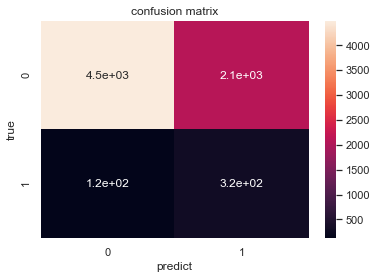

In [51]:
sns.set()
f,ax=plt.subplots()
C2= confusion_matrix(test_y, y_pred, labels=[0, 1])
print(C2) #打印出来看看
sns.heatmap(C2,annot=True,ax=ax) #画热力图

ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴

In [109]:
train_y.value_counts()

0    15370
1     1032
Name: emd_lable2, dtype: int64

In [12]:
rf = RandomForestClassifier(n_estimators=1)
train_ans=[]
test_ans=[]
for iter in range(50):
  rf.fit(train_x, train_y)
  y_train_predicted = rf.predict(train_x)
  y_test_predicted = rf.predict(test_x)
  mse_train = mean_squared_error(train_y, y_train_predicted)
  mse_test = mean_squared_error(test_y, y_test_predicted)
  print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
  train_ans.append(mse_train)
  test_ans.append(mse_test)
  rf.n_estimators += 1

Iteration: <built-in function iter> Train mse: 0.03853188635532252 Test mse: 0.10412517780938833


In [ ]:
rf = RandomForestClassifier(n_estimators=1)
train_ans=[]
test_ans=[]
rf.fit(train_x, train_y)
y_train_predicted = rf.predict(train_x)
y_test_predicted = rf.predict(test_x)
mse_train = mean_squared_error(train_y, y_train_predicted)
mse_test = mean_squared_error(test_y, y_test_predicted)
print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
train_ans.append(mse_train)
test_ans.append(mse_test)